In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
#Tutorial at
url = 'http://blog.districtdatalabs.com/visual-diagnostics-for-more-informed-machine-learning-part-1'

# Anscombe's quartet
#https://en.wikipedia.org/wiki/Anscombe%27s_quartet
i   = np.array([
    [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
])

ii  = np.array([
    [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
])

iii = np.array([
    [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
])

iv  = np.array([
    [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
    [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]
])

### What kind of model should we use to fit our data? 

In [15]:
from scipy import stats

In [16]:
def get_stats(twoDarray):
    print(np.mean(twoDarray[0]))
    print(np.mean(twoDarray[1]))
    print(np.var(twoDarray[0]))
    print(np.var(twoDarray[0]))
    print(np.corrcoef(twoDarray[0],twoDarray[1]))
    print(stats.linregress(twoDarray[0],twoDarray[1]))

In [17]:
for data in (i,ii,iii,iv):
    get_stats(data)

9.0
7.50090909091
10.0
10.0
[[ 1.          0.81642052]
 [ 0.81642052  1.        ]]
LinregressResult(slope=0.50009090909090914, intercept=3.0000909090909103, rvalue=0.81642051634483981, pvalue=0.0021696288730787992, stderr=0.11790550059563409)
9.0
7.50090909091
10.0
10.0
[[ 1.          0.81623651]
 [ 0.81623651  1.        ]]
LinregressResult(slope=0.5, intercept=3.0009090909090901, rvalue=0.81623650600024256, pvalue=0.0021788162369108066, stderr=0.11796374596764085)
9.0
7.5
10.0
10.0
[[ 1.          0.81628674]
 [ 0.81628674  1.        ]]
LinregressResult(slope=0.49972727272727269, intercept=3.0024545454545457, rvalue=0.81628673948959818, pvalue=0.0021763052792280256, stderr=0.11787766222100229)
9.0
7.50090909091
10.0
10.0
[[ 1.          0.81652144]
 [ 0.81652144  1.        ]]
LinregressResult(slope=0.49990909090909091, intercept=3.0017272727272726, rvalue=0.81652143688850276, pvalue=0.0021646023471972222, stderr=0.11781894172968553)


the four arrays have the same descriptive statistical properties. 

In [25]:
def make_plot(a, b, c, d):
    fig, ((axa, axb), (axc, axd)) =  plt.subplots(2, 2, sharex='col', sharey='row')
    for arr, ax in ((a, axa), (b, axb), (c, axc), (d, axd)):
        x = arr[0]
        y = arr[1]

        ax.scatter(x, y, c='r')
        m,b = np.polyfit(x, y, 1)
        X = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 100)
        #a simple linear regression model 
        ax.plot(X, m*X+b, '-')
    plt.show()


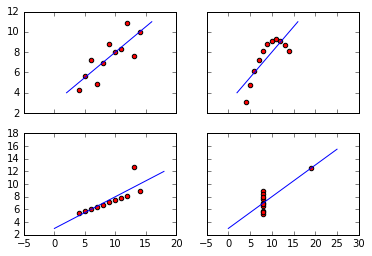

In [26]:
make_plot(i,ii,iii,iv)

Visualizations don't have to be the end of the pipeline. They can allow us to find patterns we simply cannot see by looking at raw data alone. 

show how visualization tools can offer analytical support at several key stages in the machine learning process. 

In [42]:
import os
import zipfile
import requests

OCCUPANCY = ('http://bit.ly/ddl-occupancy-dataset', 'occupancy.zip')
CREDIT    = ('http://bit.ly/ddl-credit-dataset', 'credit.xls')
CONCRETE  = ('http://bit.ly/ddl-concrete-data', 'concrete.xls')

def download_data(url, name, path='data'):
    if not os.path.exists(path):
        os.mkdir(path)

    response = requests.get(url)
    #The output file needs to be opened in binary mode:
    #http://stackoverflow.com/questions/13906623/using-pickle-dump-typeerror-must-be-str-not-bytes
    with open(os.path.join(path, name), 'wb') as f:
        f.write(response.content)


def download_all(path='data'):
    for href, name in (OCCUPANCY, CREDIT, CONCRETE):
        download_data(href, name, path)

    # Extract the occupancy zip data
    z = zipfile.ZipFile(os.path.join(path, 'occupancy.zip'))
    z.extractall(os.path.join(path, 'occupancy'))



In [43]:
path='data'
download_all(path)

### Feature selection is key to successful machine learning.

In these real-world scenarios, we anticipate that perhaps only some attributes may be predictive (and only if we are lucky!) and that others may not be predictive at all. We also anticipate situations where there is redundancy across attributes (e.g. one is a linear combination of two others).

#### With feature selection, our goal is to find the smallest set of the available features such that the fitted model will reach it's maximal predictive value. 

### Statistical measures like mean and variance are a very useful first step to unpacking the features to prepare for selection.

In [45]:
import pandas as pd

# Load the room occupancy dataset
occupancy = os.path.join('data','occupancy_data','datatraining.txt')
occupancy = pd.read_csv(occupancy, sep=',')
occupancy.columns = [
    'date', 'temp', 'humid', 'light', 'co2', 'hratio', 'occupied'
]

# View the occupancy details
print(occupancy.head())
print(occupancy.describe())

# Load the credit card default dataset
credit = os.path.join('data','credit.xls')
credit = pd.read_excel(credit, header=1)
credit.columns = [
    'id', 'limit', 'sex', 'edu', 'married', 'age', 'apr_delay', 'may_delay',
    'jun_delay', 'jul_delay', 'aug_delay', 'sep_delay', 'apr_bill', 'may_bill',
    'jun_bill', 'jul_bill', 'aug_bill', 'sep_bill', 'apr_pay', 'may_pay', 'jun_pay',
    'jul_pay', 'aug_pay', 'sep_pay', 'default'
]

# View the credit details
print(credit.head())
print(credit.describe())

# Load the concrete compression data set
concrete   = pd.read_excel(os.path.join('data','concrete.xls'))
concrete.columns = [
    'cement', 'slag', 'ash', 'water', 'splast',
    'coarse', 'fine', 'age', 'strength'
]

# View the concrete details
print(concrete.head())
print(concrete.describe())

                  date   temp    humid  light     co2    hratio  occupied
1  2015-02-04 17:51:00  23.18  27.2720  426.0  721.25  0.004793         1
2  2015-02-04 17:51:59  23.15  27.2675  429.5  714.00  0.004783         1
3  2015-02-04 17:53:00  23.15  27.2450  426.0  713.50  0.004779         1
4  2015-02-04 17:54:00  23.15  27.2000  426.0  708.25  0.004772         1
5  2015-02-04 17:55:00  23.10  27.2000  426.0  704.50  0.004757         1
              temp        humid        light          co2       hratio  \
count  8143.000000  8143.000000  8143.000000  8143.000000  8143.000000   
mean     20.619084    25.731507   119.519375   606.546243     0.003863   
std       1.016916     5.531211   194.755805   314.320877     0.000852   
min      19.000000    16.745000     0.000000   412.750000     0.002674   
25%      19.700000    20.200000     0.000000   439.000000     0.003078   
50%      20.390000    26.222500     0.000000   453.500000     0.003801   
75%      21.390000    30.533333   256.

We can start to get a feel for the differences across our three datasets from the output of the .describe() statements above. 

### Below we'll explore our three datasets using some common approaches to visualizing features, including:

## As we're exploring the graphs, the two key things we want to be looking for are signal (e.g. patterns, separability, relationships between our features and our targets, relationships between different features, etc.) and volatility (e.g. amount of noise, distribution of data, etc.).

Boxplots (or 'box-and-whisker' plots) enable us to look at the central tendency of the data, see the distribution, and examine outliers.

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:2125: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


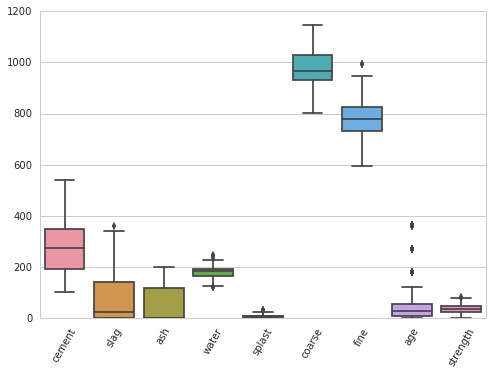

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

def box_viz(df):
    ax = sns.boxplot(df)
    plt.xticks(rotation=60)
    plt.show()

box_viz(concrete)


A boxplot of our concrete dataset (shown below, along with the code needed to generate it) shows us that most of the features are on a similar scale, with the exception of 'coarse' and 'fine'. This suggests that we may want to rescale our features before we begin modeling.

Violinplots are a nice alternative to traditional box-and-whiskers, because they provide the same information but also reflect relative kernel density estimates, which can be useful when looking for separability. Additionally, the two sides of the violin can be used to show relative distributions of categorical variables (particularly useful for binary classifiers)! 

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:2296: UserWarning: The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


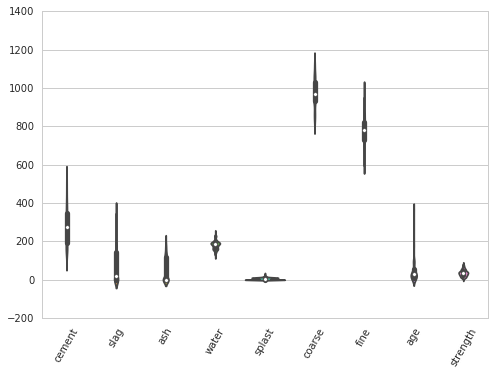

In [47]:
def box_viz(df):
    ax = sns.violinplot(df)
    plt.xticks(rotation=60)
    plt.show()

box_viz(concrete)

Histograms enable us to bin values of individual features into buckets and visualize the domain of the feature by exposing the frequency of values as the relative size of each bucket. 

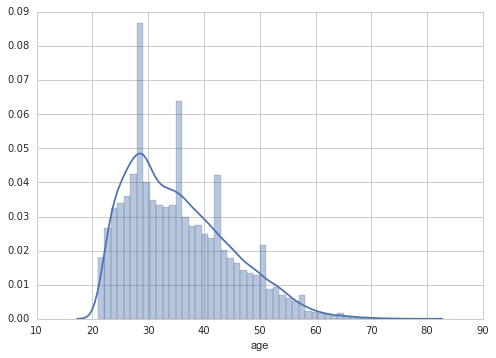

In [48]:
def hist_viz(df,feature):
    ax = sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.show()

hist_viz(credit,'age') # We need to specify a feature vector

One notable observation from this visualization is that most of the people represented in the data are under the age of 40.

Sploms are a way to check the pairwise relationships between features. When we look at a scatterplot matrix, we are looking for covariance, for relationships that appear to be linear, quadratic, or exponential, and for either homoscedastic or heteroscedastic behavior that will tell us how the features are dispersed relative to each other.

A material or image that is homogeneous is uniform in composition or character (i.e. color, shape, size, weight, height, distribution, texture, language, income, disease, temperature, radioactivity, architectural design, etc.); one that is heterogeneous is distinctly nonuniform in one of these qualities.

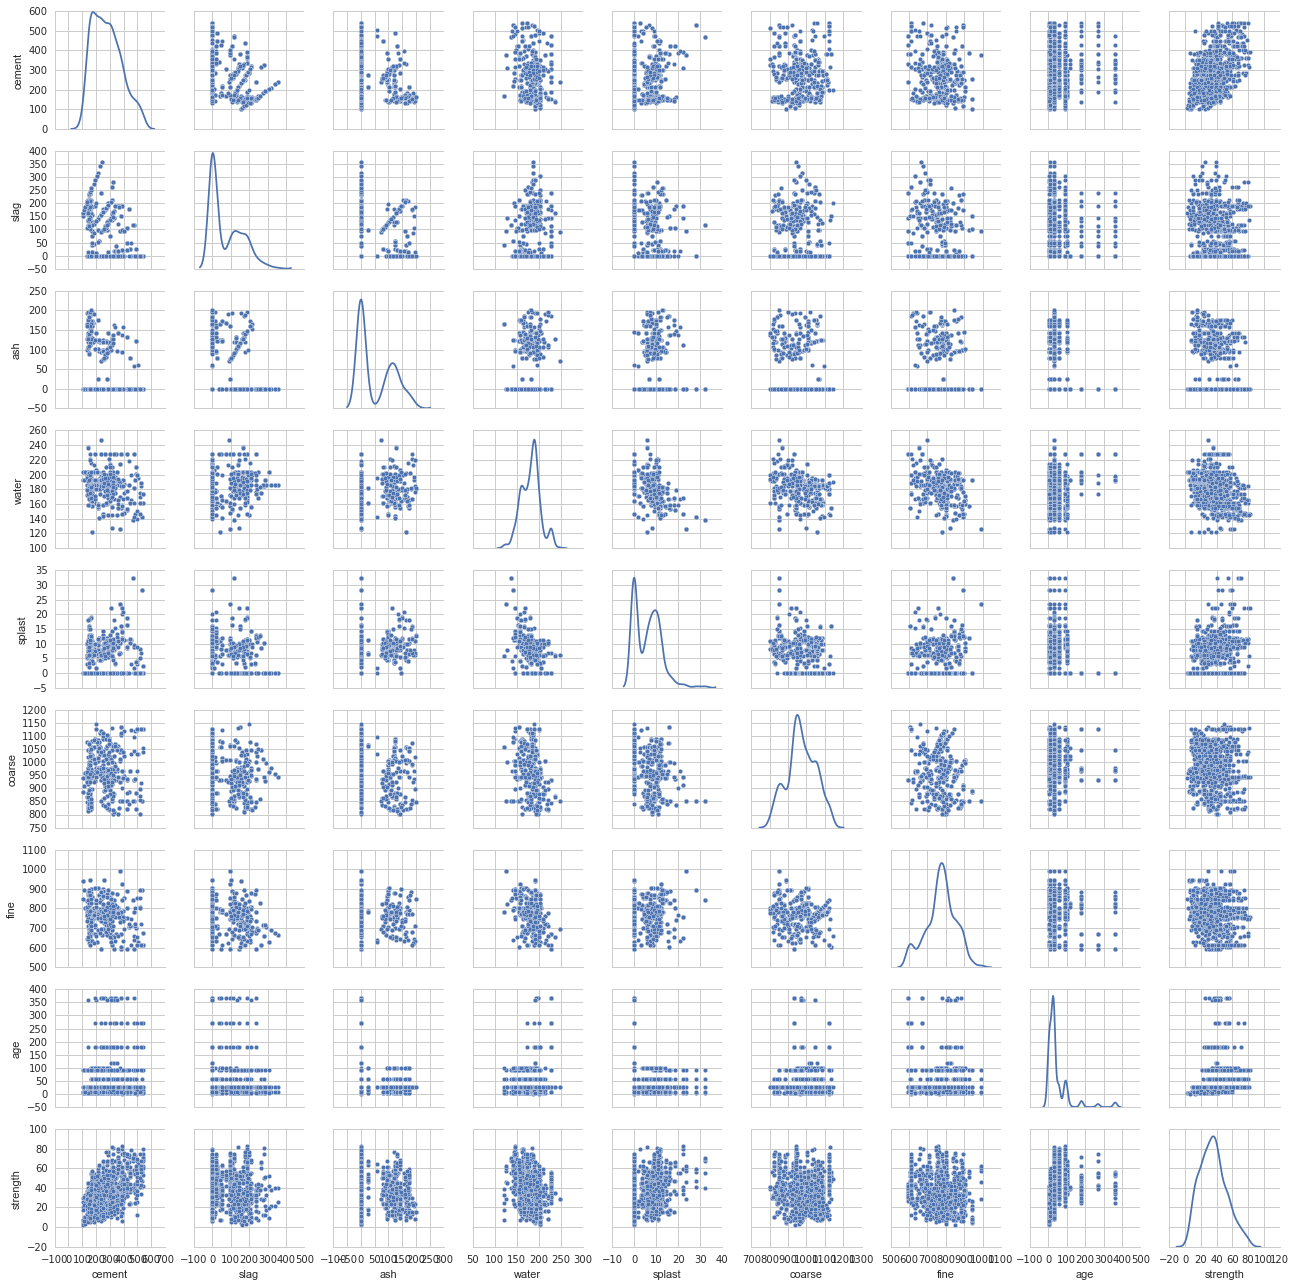

In [49]:
def splom_viz(df, labels=None):
    ax = sns.pairplot(df, hue=labels, diag_kind='kde', size=2)
    plt.show()

splom_viz(concrete)

Radial visualizations are based on a spring tension minimization algorithm. The features of the dataset are equally spaced on a unit circle and the instances are dropped into the center of the circle. The features then 'pull' the instances towards their position on the circle in proportion to their normalized numerical value for that instance.

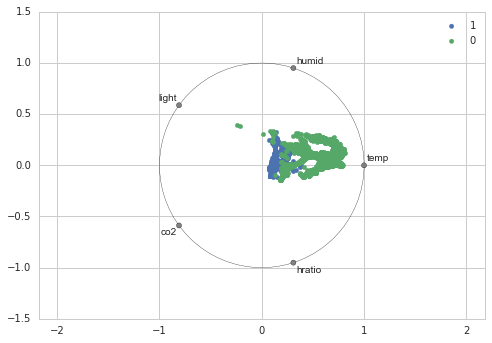

In [50]:
from pandas.tools.plotting import radviz

def rad_viz(df,labels):
    fig = radviz(df, labels, color=sns.color_palette())
    plt.show()

rad_viz(occupancy.ix[:,1:],'occupied') # Specify which column contains the labels

Parallel coordinates, like radviz plots, are a way to visualize clusters in data. Data points are represented as connected line segments. The x-axis units are not meaningful, and instead, each vertical line represents one attribute. One set of connected line segments represents one instance. Points that tend to cluster will appear closer together, and we look for thick chords or braids of lines of the same color that would indicate good class separability.

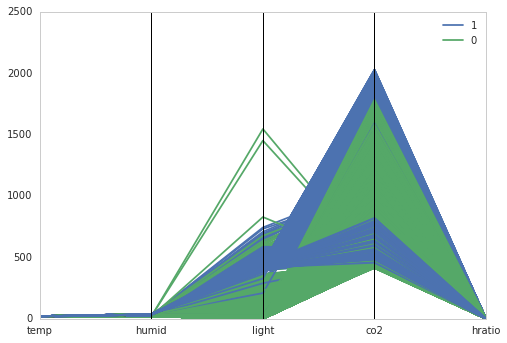

In [51]:
from pandas.tools.plotting import parallel_coordinates

def pcoord_viz(df, labels):
    fig = parallel_coordinates(df, labels, color=sns.color_palette())
    plt.show()

pcoord_viz(occupancy.ix[:,1:],'occupied') # Specify which column contains the labels


As they are currently implemented in Python, neither radviz nor parallel coordinates scale particularly well to very high dimensional data (although, making them more interactive and enabling the user to drag features in and out of the graph would help!).

Generally speaking, the number of dimensions must be reduced through techniques such as hierarchical aggregation, dimensionality reduction (like PCA and LDA), and dimensional subsetting. For dimensional subsetting, one visual tactic is to use the scatterplot matrix approach to generate small multiples. Another is to do a series of independent jointplots to examine the relationships and correlations between each possible pair of features.

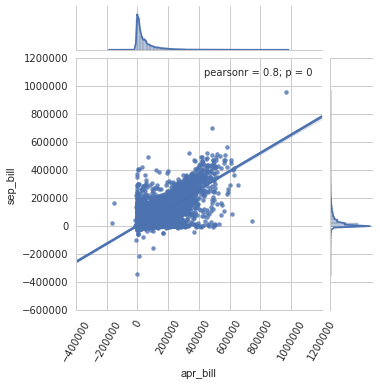

In [52]:
def joint_viz(feat1,feat2,df):
    ax = sns.jointplot(feat1, feat2, data=df, kind='reg', size=5)
    plt.xticks(rotation=60)
    plt.show()

joint_viz('apr_bill','sep_bill',credit)

## The Model Selection Triple

Producing a fitted model that is well-suited to the data, predictive, and also performant is critically dependent on feature selection and tuning as well as model selection.

I identify the category of machine learning models best suited to my features and problem space, often experimenting with fit-predict on multiple models. I iterate between evaluation and tuning using a combination of numeric and visual tools like ROC curves, residual plots, heat maps and validation curves. Finally, the best model is stored back to disk for later use.

## Getting Started with Model Selection

In [55]:
#First we are asked whether we have more than 50 samples for each of our datasets.
print (len(occupancy)) # 8,143
print (len(credit))    # 30,000
print (len(concrete))  # 1,030

8143
30000
1030


Next we're asked if we're predicting a category. 

Since both of our categorical datasets have fewer than 100,000 instances, we are prompted to start with sklearn.svm.LinearSVC (which will map the data to a higher dimensional feature space), or failing that, sklearn.neighbors.KNeighborsClassifier (which will assign instances to the class most common among its k nearest neighbors). In our feature exploration of the occupancy dataset, you'll remember that the different attributes were not all on the same scale, so in addition to the other steps, we import scale so that we can standardize all the features before we run fit-predict

In [59]:
from sklearn.preprocessing import scale
from sklearn import cross_validation as cv
from sklearn.metrics import confusion_matrix

from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

def classify(attributes, targets, model):
    # Split data into 'test' and 'train' for cross validation
    splits = cv.train_test_split(attributes, targets, test_size=0.2)
    X_train, X_test, y_train, y_test = splits

    model.fit(X_train, y_train)
    y_true = y_test
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_true, y_pred))



In [60]:
# Divide data frame into features and labels
features = occupancy[['temp', 'humid', 'light', 'co2', 'hratio']]
labels   = occupancy['occupied']



In [61]:
# Scale the features
stdfeatures = scale(features)

classify(stdfeatures, labels, LinearSVC())


[[1261   18]
 [   6  344]]


In [62]:
classify(stdfeatures, labels, KNeighborsClassifier())

[[1276    2]
 [   3  348]]


In [63]:
# let's use the same classify function to model the credit default dataset next
features = credit[[
    'limit', 'sex', 'edu', 'married', 'age', 'apr_delay', 'may_delay',
    'jun_delay', 'jul_delay', 'aug_delay', 'sep_delay', 'apr_bill', 'may_bill',
    'jun_bill', 'jul_bill', 'aug_bill', 'sep_bill', 'apr_pay', 'may_pay',
    'jun_pay', 'jul_pay', 'aug_pay', 'sep_pay'
]]
labels   = credit['default']

stdfeatures = scale(features)

classify(stdfeatures, labels, LinearSVC())
classify(stdfeatures, labels, KNeighborsClassifier())

[[4578   84]
 [1101  237]]
[[4313  386]
 [ 823  478]]


R^2 (coefficient of determination) regression score function.
Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

In [67]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

def regress(attributes, targets, model):
    splits = cv.train_test_split(attributes, targets, test_size=0.2)
    X_train, X_test, y_train, y_test = splits

    model.fit(X_train, y_train)
    y_true = y_test
    y_pred = model.predict(X_test)
    print(('Mean squared error = {:0.3f}'.format(mse(y_true, y_pred))))
    print(('R2 score = {:0.3f}'.format(r2_score(y_true, y_pred))))

features = concrete[[
    'cement', 'slag', 'ash', 'water', 'splast', 'coarse', 'fine', 'age'
]]
labels   = concrete['strength']

regress(features, labels, Ridge())
regress(features, labels, Lasso())
regress(features, labels, ElasticNet())

Mean squared error = 120.489
R2 score = 0.532
Mean squared error = 117.955
R2 score = 0.569
Mean squared error = 104.881
R2 score = 0.601


## Classifier comparison

Automatically created module for IPython interactive environment


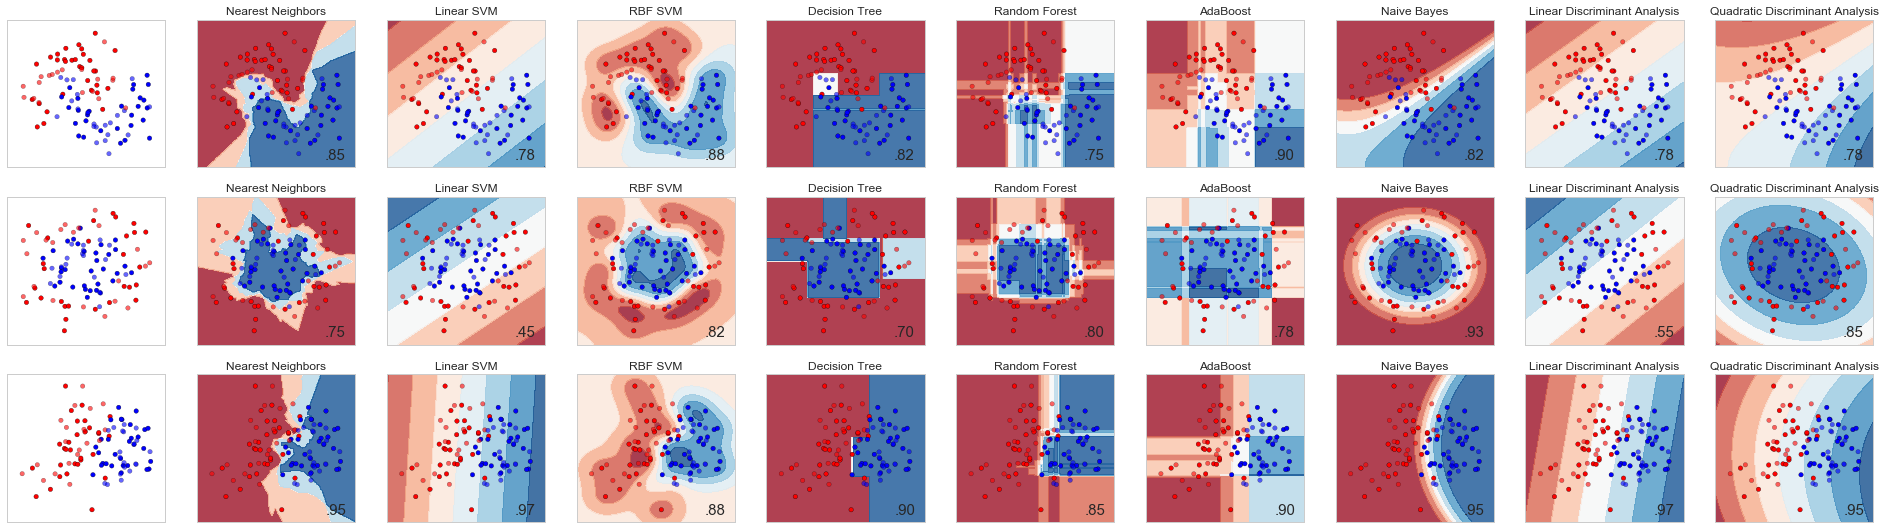

In [68]:
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree",
         "Random Forest", "AdaBoost", "Naive Bayes", "Linear Discriminant Analysis",
         "Quadratic Discriminant Analysis"]
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds in datasets:
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()

## Comparing different clustering algorithms on toy datasets

Automatically created module for IPython interactive environment


C:\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:217: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Anaconda3\lib\site-packages\sklearn\cluster\hierarchical.py:207: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_components = _fix_connectivity(X, connectivity)
C:\Anaconda3\lib\site-packages\sklearn\cluster\hierarchical.py:443: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_components = _fix_connectivity(X, connectivity)
C:\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:217: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\A

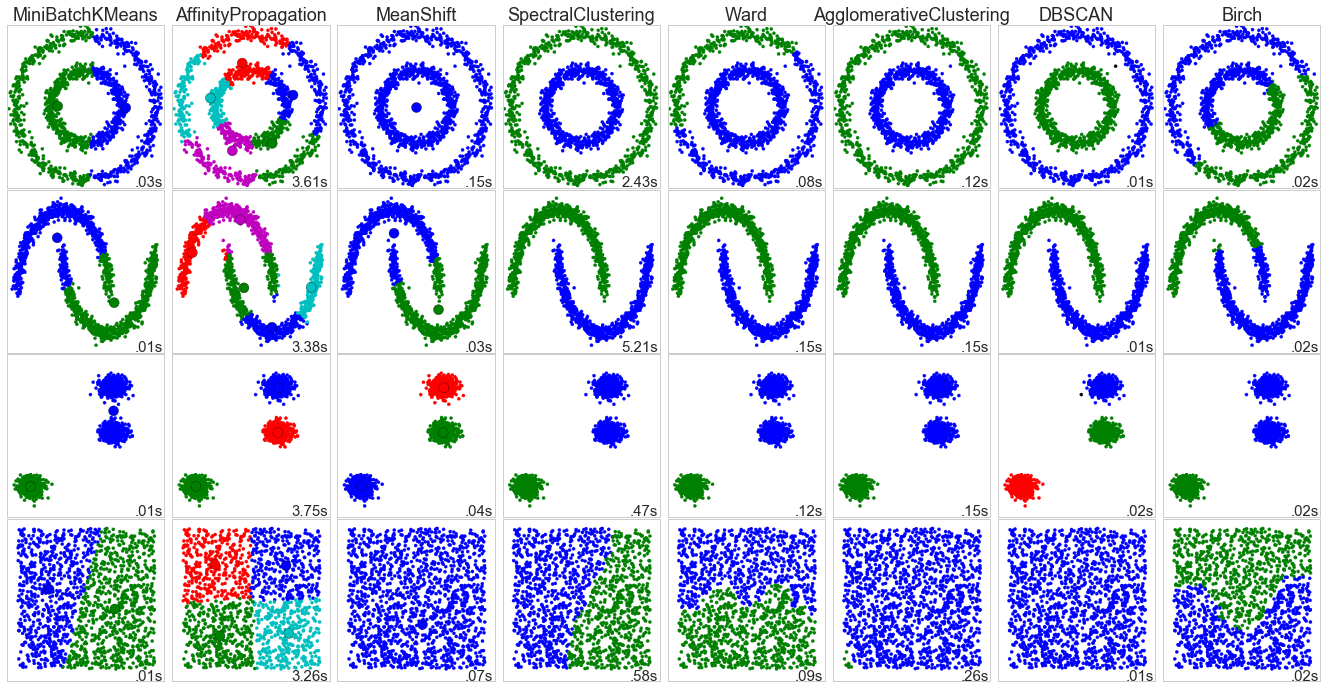

In [69]:
print(__doc__)

import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

np.random.seed(0)

# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)

clustering_names = [
    'MiniBatchKMeans', 'AffinityPropagation', 'MeanShift',
    'SpectralClustering', 'Ward', 'AgglomerativeClustering',
    'DBSCAN', 'Birch']

plt.figure(figsize=(len(clustering_names) * 2 + 3, 9.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

datasets = [noisy_circles, noisy_moons, blobs, no_structure]
for i_dataset, dataset in enumerate(datasets):
    X, y = dataset
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=0.3)

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(X, n_neighbors=10, include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # create clustering estimators
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=2)
    ward = cluster.AgglomerativeClustering(n_clusters=2, linkage='ward',
                                           connectivity=connectivity)
    spectral = cluster.SpectralClustering(n_clusters=2,
                                          eigen_solver='arpack',
                                          affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=.2)
    affinity_propagation = cluster.AffinityPropagation(damping=.9,
                                                       preference=-200)

    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock", n_clusters=2,
        connectivity=connectivity)

    birch = cluster.Birch(n_clusters=2)
    clustering_algorithms = [
        two_means, affinity_propagation, ms, spectral, ward, average_linkage,
        dbscan, birch]

    for name, algorithm in zip(clustering_names, clustering_algorithms):
        # predict cluster memberships
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        # plot
        plt.subplot(4, len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)
        plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10)

        if hasattr(algorithm, 'cluster_centers_'):
            centers = algorithm.cluster_centers_
            center_colors = colors[:len(centers)]
            plt.scatter(centers[:, 0], centers[:, 1], s=100, c=center_colors)
        plt.xlim(-2, 2)
        plt.ylim(-2, 2)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

Generally these images are used just to demonstrate the substantial differences in the performance of various models across different datasets.

the word 'model' is an overloaded term because we use it to mean at least three different things:

1. the model family (e.g. linear model, nearest neighbors, support vector machine, trees, Bayes, ensemble methods)

2. the model form (e.g. sklearn.linear_model.Ridge(), sklearn.linear_model.Lasso(), sklearn.linear_model.ElasticNet)

3. the fitted model (e.g. the result of Ridge().fit(X_train, y_train))

## How do you know when your machine learning model is working?

### Tools for Evaluation

 The overarching idea I want to convey is that that a single score, or even a single plot, is not enough. It isn't useful to think of machine learning models as 'good' or 'bad' devoid of context. A model is good if it manages to use the smallest set of features that produce the most predictive model. A fitted model is good if it's better than the results you get from fitting another model form or if it's better than the model you used to make predictions yesterday. 

Scikit-Learn comes with a built-in function for generating confusion matrices, sklearn.metrics.confusion_matrix, which takes as an argument the actual values from the dataset and the predicted values generated by the fitted model, and outputs a confusion matrix.

### Classification Reports

Classification reports include the same basic information as in a confusion matrix, but with several added advantages. First, where the confusion matrix merely labels whether instances have be classified properly or improperly, a classification report provides three different evaluation metrics: precision, recall, and F1 score. Moreover, the classification report can conveniently include the names of the labels for each of the classes, which helps a lot with interpretability. 

from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=target_names))